In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [25]:
col= []
for a in range(1,65):
    col.append('x'+str(a))
col.append('y')

year_1 = arff.loadarff("data/1year.arff")
# year_2 = arff.loadarff("data/2year.arff")
# year_3 = arff.loadarff("data/3year.arff")
# year_4 = arff.loadarff("data/4year.arff")
# year_5 = arff.loadarff("data/5year.arff")

df_year_1 = pd.DataFrame(year_1[0])
# df_year_2 = pd.DataFrame(year_2[0])
# df_year_3 = pd.DataFrame(year_3[0])
# df_year_4 = pd.DataFrame(year_4[0])
# df_year_5 = pd.DataFrame(year_5[0])

df_year_1.columns = col
df_year_1['y'] = df_year_1['y'].str.decode('utf-8')

# df_year_2.columns = col
# df_year_2['y'] = df_year_2['y'].str.decode('utf-8')

# df_year_3.columns = col
# df_year_3['y'] = df_year_3['y'].str.decode('utf-8')

# df_year_4.columns = col
# df_year_4['y'] = df_year_4['y'].str.decode('utf-8')

# df_year_5.columns = col
# df_year_5['y'] = df_year_5['y'].str.decode('utf-8')


In [26]:
df_year_1.y.value_counts()

y
0    6756
1     271
Name: count, dtype: int64

In [27]:
df_year_1.replace('?',np.nan,inplace=True)

In [28]:
df_year_1.isna().sum()

x1      3
x2      3
x3      3
x4     30
x5      8
       ..
x61    22
x62     0
x63    30
x64    34
y       0
Length: 65, dtype: int64

In [31]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# multiple imputation for all missing values
imputer = IterativeImputer(max_iter=10, random_state=1)
df_imputed_array = imputer.fit_transform(df_year_1)

df_imputed = pd.DataFrame(df_imputed_array, columns=df_year_1.columns)

C:\Users\amfua\AppData\Roaming\Python\Python39\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
df_imputed.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,0.49788,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0


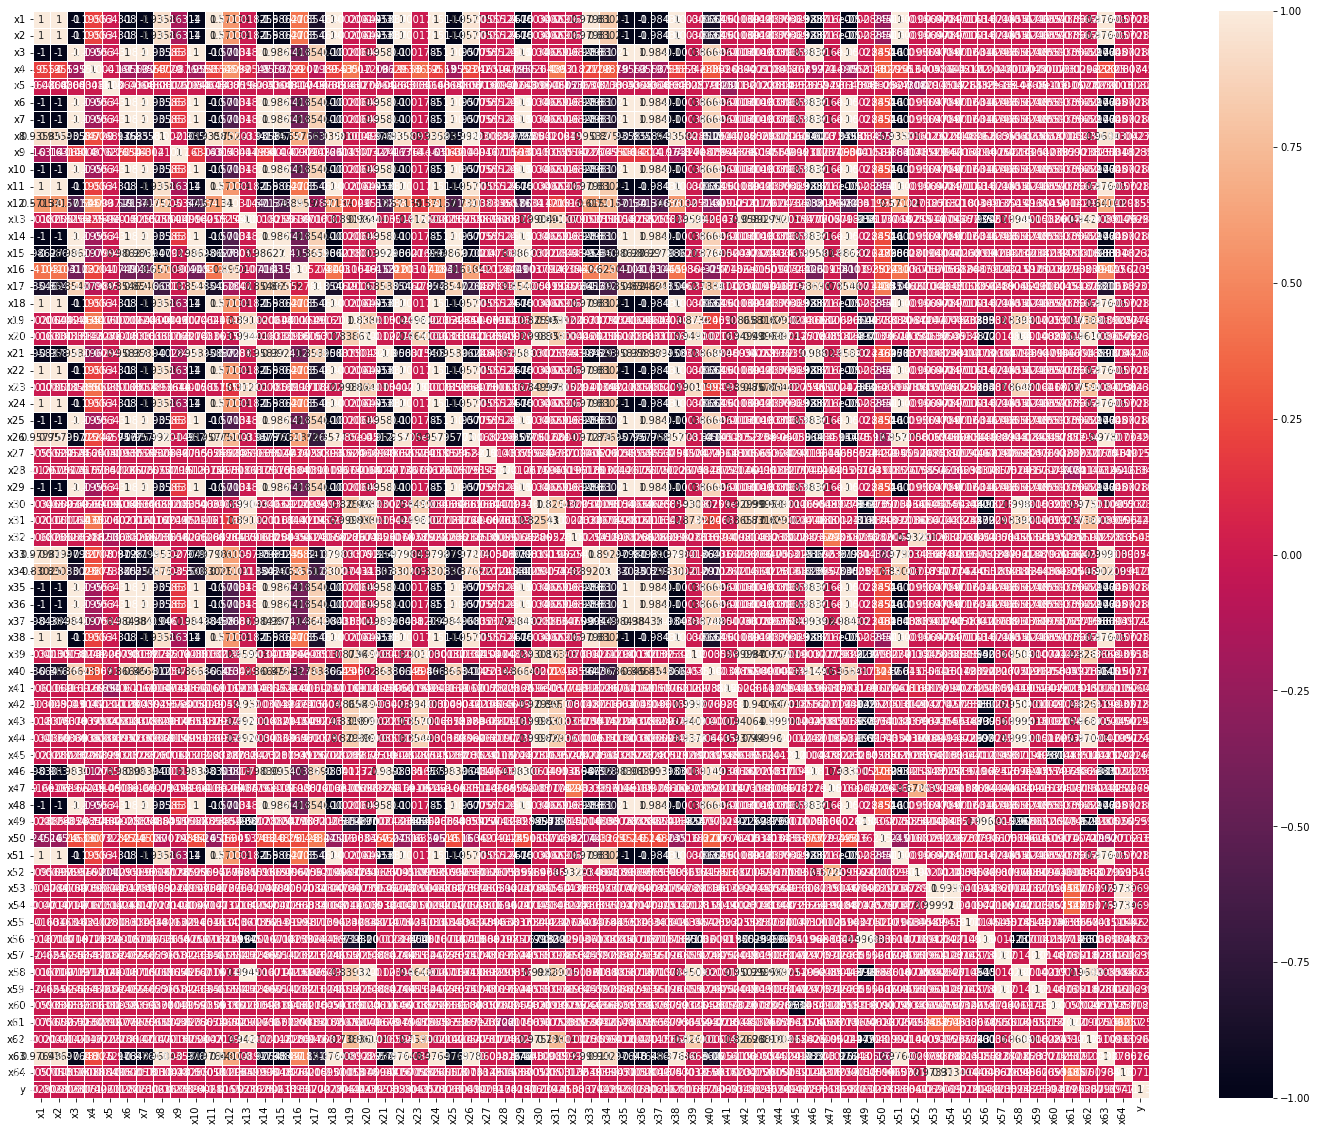

In [35]:
# Heatmap correlation plot for all variables

plt.figure(figsize = (25, 20))

corr = df_imputed.corr()

sns.heatmap(data = corr,  annot = True, fmt = '.05g', linewidth = 1)
plt.show()

C:\Users\amfua\AppData\Local\Temp/ipykernel_29812/804916542.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputed[col])
C:\Users\amfua\AppData\Local\Temp/ipykernel_29812/804916542.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputed[col])
C:\Users\amfua\AppData\Local\Temp/ipyk

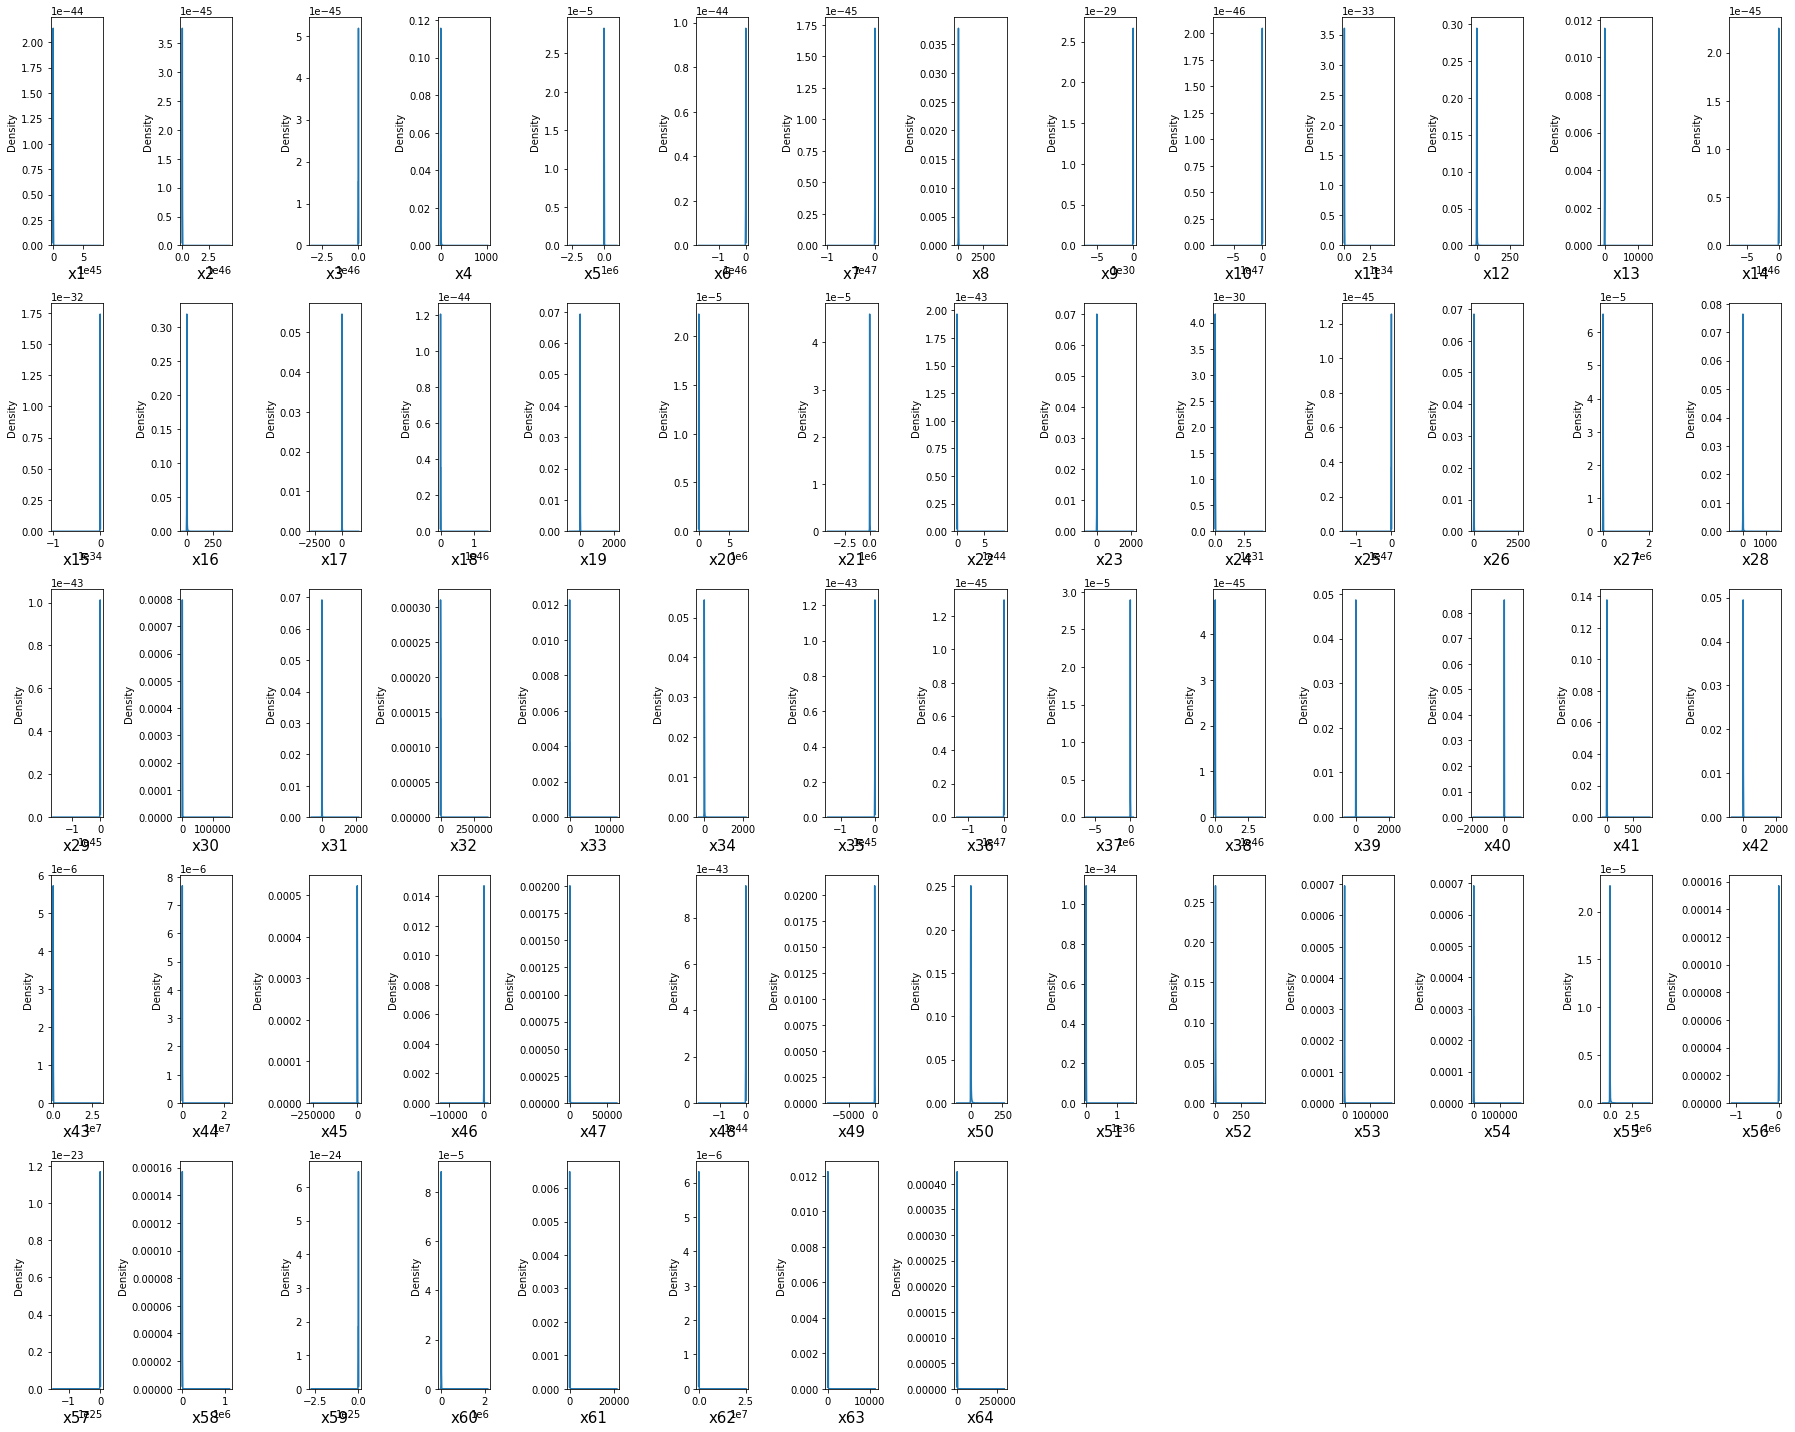

In [36]:
# Histogram of Continuous variable
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df_imputed.columns:
    if plotnumber <= 64:
        ax = plt.subplot(5, 14, plotnumber)
        sns.distplot(df_imputed[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()